# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().values.any()

False

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='ms')

In [6]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 5. NASDAQ.EBAY

In [7]:
df_EBAY = pd.DataFrame(data['NASDAQ.EBAY'])
df_EBAY.set_index(data['DATE'], inplace=True)
df_EBAY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 1970-01-18 06:13:46.200000 to 1970-01-18 09:50:09.600000
Data columns (total 1 columns):
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(1)
memory usage: 644.8 KB


In [8]:
df_EBAY.head(5)

,NASDAQ.EBAY
DATE,
1970-01-18 06:13:46.200,33.3975
1970-01-18 06:13:46.260,33.3950
1970-01-18 06:13:46.320,33.4100
1970-01-18 06:13:46.380,33.3350
1970-01-18 06:13:46.440,33.4000


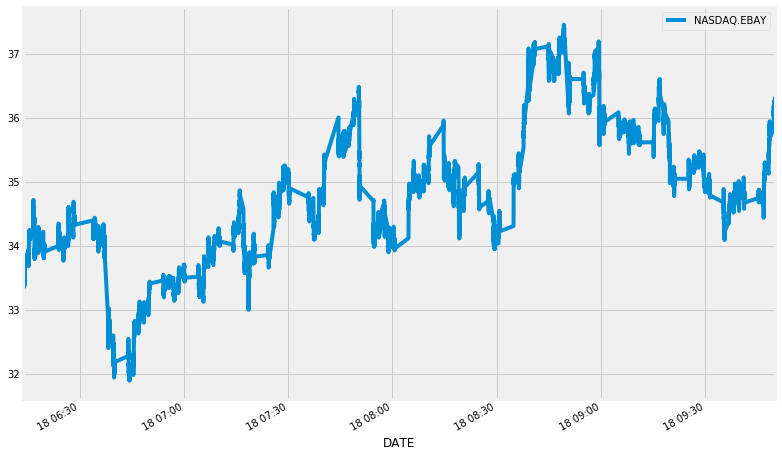

In [9]:
df_EBAY.plot(figsize=(12,8))

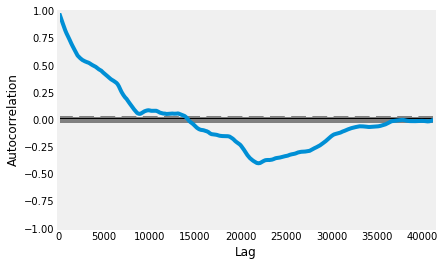

In [10]:
# Create an autocorrelation plot. 
autocorrelation_plot(df_EBAY)
plt.show()

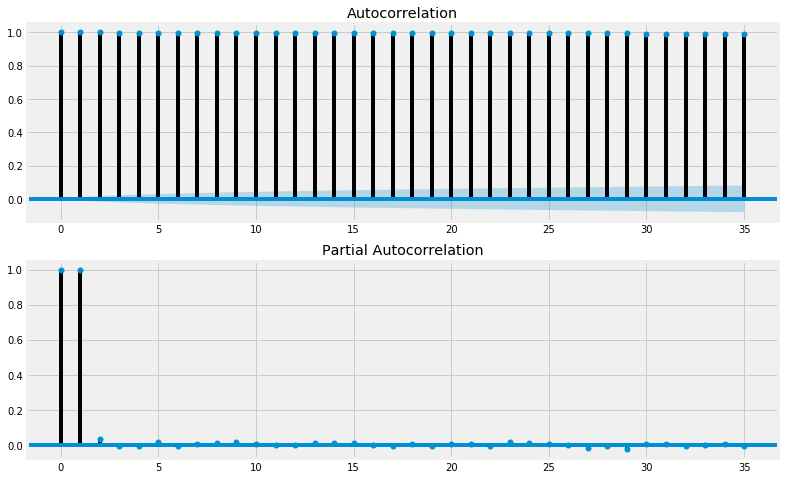

In [11]:
# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY, method='ywmle', lags=35, ax=ax2)

In [12]:
model = ARIMA(df_EBAY, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.EBAY   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               96737.303
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 21 Feb 2019   AIC                        -193460.605
Time:                        01:26:46   BIC                        -193400.211
Sample:                             1   HQIC                       -193441.517
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.622e-05      0.000      0.603      0.546      -0.000       0.000
ar.L1.D.NASDAQ.EBAY    -0.0409      0.005     -8.310      0.000      -0.051      -0.031
ar.L2.D.NASDAQ.E

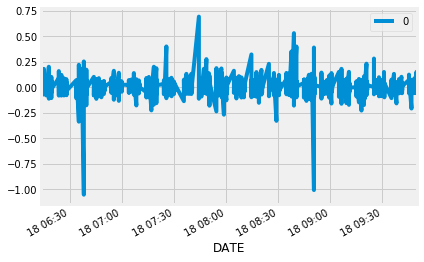

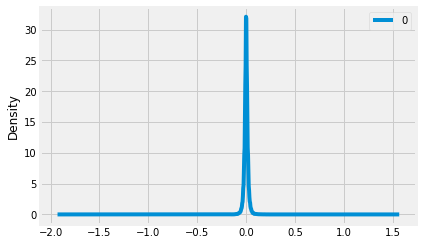

                  0
count  4.126500e+04
mean  -4.683978e-09
std    2.320887e-02
min   -1.055301e+00
25%   -9.854498e-03
50%   -6.889721e-05
75%    9.732174e-03
max    6.916173e-01


In [13]:
# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
# Test the model with train and test data 
size=int(len(df_EBAY)*0.7)
train, test = df_EBAY.values[0:size], df_EBAY.values[size:len(df_EBAY)]
len(train), len(test)

(28886, 12380)

In [15]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]
for t in range (len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('%d. predicted=%f, expected=%f' % (len(predictions), yhat, test[t]))

1. predicted=37.015270, expected=37.020000
2. predicted=37.020643, expected=37.030000
3. predicted=37.029895, expected=37.030000
4. predicted=37.030101, expected=37.030000
5. predicted=37.030003, expected=37.049900
6. predicted=37.049402, expected=37.040000
7. predicted=37.040725, expected=37.070000
8. predicted=37.069278, expected=37.070000
9. predicted=37.070310, expected=37.075000
10. predicted=37.075187, expected=37.080000
11. predicted=37.079479, expected=37.035000
12. predicted=37.036152, expected=37.030000
13. predicted=37.029229, expected=37.060000
14. predicted=37.059380, expected=37.050000
15. predicted=37.051907, expected=37.050000
16. predicted=37.049990, expected=37.070000
17. predicted=37.069083, expected=37.050000
18. predicted=37.051153, expected=37.040000
19. predicted=37.039912, expected=37.045000
20. predicted=37.044430, expected=37.060000
21. predicted=37.060366, expected=37.060000
22. predicted=37.060631, expected=37.080000
23. predicted=37.079582, expected=37.0800

186. predicted=37.131159, expected=37.145000
187. predicted=37.144024, expected=37.150000
188. predicted=37.150204, expected=37.160000
189. predicted=37.161078, expected=37.225000
190. predicted=37.223665, expected=37.195000
191. predicted=37.196921, expected=37.200000
192. predicted=37.199097, expected=37.205000
193. predicted=37.203766, expected=37.230000
194. predicted=37.230361, expected=37.220000
195. predicted=37.220722, expected=37.240000
196. predicted=37.239368, expected=37.249900
197. predicted=37.249707, expected=37.200000
198. predicted=37.201544, expected=37.200000
199. predicted=37.198689, expected=37.200000
200. predicted=37.200008, expected=37.210000
201. predicted=37.211013, expected=37.240000
202. predicted=37.239715, expected=37.210000
203. predicted=37.211333, expected=37.220000
204. predicted=37.219058, expected=37.245000
205. predicted=37.244214, expected=37.234900
206. predicted=37.236378, expected=37.220000
207. predicted=37.219981, expected=37.225000
208. predi

369. predicted=37.448847, expected=37.400000
370. predicted=37.400817, expected=37.365000
371. predicted=37.363865, expected=37.360000
372. predicted=37.359441, expected=37.365000
373. predicted=37.366023, expected=37.405000
374. predicted=37.405196, expected=37.390000
375. predicted=37.391297, expected=37.350000
376. predicted=37.350565, expected=37.300000
377. predicted=37.299539, expected=37.345000
378. predicted=37.343655, expected=37.345000
379. predicted=37.346882, expected=37.300000
380. predicted=37.302168, expected=37.245000
381. predicted=37.244458, expected=37.220000
382. predicted=37.219676, expected=37.230000
383. predicted=37.230510, expected=37.295000
384. predicted=37.295240, expected=37.295000
385. predicted=37.296856, expected=37.315000
386. predicted=37.314450, expected=37.290000
387. predicted=37.289550, expected=37.260000
388. predicted=37.260280, expected=37.250000
389. predicted=37.249371, expected=37.240000
390. predicted=37.240751, expected=37.220000
391. predi

552. predicted=37.140964, expected=37.155000
553. predicted=37.154978, expected=37.170000
554. predicted=37.169901, expected=37.190000
555. predicted=37.190767, expected=37.175000
556. predicted=37.175441, expected=37.180000
557. predicted=37.179392, expected=37.190000
558. predicted=37.189576, expected=37.180000
559. predicted=37.180855, expected=37.200000
560. predicted=37.199411, expected=37.220000
561. predicted=37.219859, expected=37.200000
562. predicted=37.201111, expected=37.200000
563. predicted=37.199295, expected=37.200000
564. predicted=37.199700, expected=37.200000
565. predicted=37.200589, expected=37.190000
566. predicted=37.190341, expected=37.190000
567. predicted=37.189954, expected=37.150000
568. predicted=37.150976, expected=37.155000
569. predicted=37.154539, expected=37.145000
570. predicted=37.145476, expected=37.125000
571. predicted=37.126274, expected=37.135000
572. predicted=37.134461, expected=37.135000
573. predicted=37.135561, expected=37.200000
574. predi

735. predicted=36.235607, expected=36.240000
736. predicted=36.239676, expected=36.220000
737. predicted=36.220974, expected=36.120000
738. predicted=36.124696, expected=36.120000
739. predicted=36.118061, expected=36.109300
740. predicted=36.109582, expected=36.070000
741. predicted=36.073362, expected=36.109000
742. predicted=36.106409, expected=36.170000
743. predicted=36.167759, expected=36.140000
744. predicted=36.143538, expected=36.170000
745. predicted=36.167888, expected=36.207500
746. predicted=36.205157, expected=36.205000
747. predicted=36.206579, expected=36.265000
748. predicted=36.261930, expected=36.260000
749. predicted=36.260829, expected=36.230000
750. predicted=36.231924, expected=36.250000
751. predicted=36.247595, expected=36.280000
752. predicted=36.278875, expected=36.290000
753. predicted=36.290774, expected=36.305000
754. predicted=36.304451, expected=36.380000
755. predicted=36.376345, expected=36.375000
756. predicted=36.376662, expected=36.325000
757. predi

918. predicted=36.479147, expected=36.450000
919. predicted=36.451990, expected=36.460000
920. predicted=36.458748, expected=36.460000
921. predicted=36.459774, expected=36.465000
922. predicted=36.465393, expected=36.455000
923. predicted=36.455532, expected=36.410000
924. predicted=36.412146, expected=36.430000
925. predicted=36.428159, expected=36.415000
926. predicted=36.416042, expected=36.415000
927. predicted=36.415659, expected=36.410000
928. predicted=36.409937, expected=36.405000
929. predicted=36.405486, expected=36.410000
930. predicted=36.409734, expected=36.405000
931. predicted=36.405482, expected=36.410000
932. predicted=36.409881, expected=36.395000
933. predicted=36.395816, expected=36.382400
934. predicted=36.382953, expected=36.385000
935. predicted=36.384564, expected=36.410000
936. predicted=36.409077, expected=36.430000
937. predicted=36.429803, expected=36.410000
938. predicted=36.411580, expected=36.410000
939. predicted=36.409494, expected=36.405000
940. predi

1098. predicted=36.479193, expected=36.505000
1099. predicted=36.504142, expected=36.500000
1100. predicted=36.501070, expected=36.520000
1101. predicted=36.519028, expected=36.500000
1102. predicted=36.501027, expected=36.500000
1103. predicted=36.499995, expected=36.495000
1104. predicted=36.494941, expected=36.505000
1105. predicted=36.504811, expected=36.505000
1106. predicted=36.505233, expected=36.480000
1107. predicted=36.481460, expected=36.440000
1108. predicted=36.441514, expected=36.405000
1109. predicted=36.405987, expected=36.429000
1110. predicted=36.427443, expected=36.390000
1111. predicted=36.392678, expected=36.410000
1112. predicted=36.409144, expected=36.410000
1113. predicted=36.409830, expected=36.410000
1114. predicted=36.410770, expected=36.380000
1115. predicted=36.381294, expected=36.385000
1116. predicted=36.384378, expected=36.390000
1117. predicted=36.389733, expected=36.395000
1118. predicted=36.395378, expected=36.430000
1119. predicted=36.428451, expecte

1277. predicted=36.364944, expected=36.375000
1278. predicted=36.375078, expected=36.380000
1279. predicted=36.379824, expected=36.390000
1280. predicted=36.389692, expected=36.370000
1281. predicted=36.371136, expected=36.370000
1282. predicted=36.369780, expected=36.370000
1283. predicted=36.369837, expected=36.365000
1284. predicted=36.365618, expected=36.370000
1285. predicted=36.369778, expected=36.360000
1286. predicted=36.360638, expected=36.340000
1287. predicted=36.341019, expected=36.320000
1288. predicted=36.320625, expected=36.320000
1289. predicted=36.319787, expected=36.330000
1290. predicted=36.329755, expected=36.320000
1291. predicted=36.321020, expected=36.305000
1292. predicted=36.305737, expected=36.300000
1293. predicted=36.299904, expected=36.300000
1294. predicted=36.300059, expected=36.310000
1295. predicted=36.309783, expected=36.300000
1296. predicted=36.300816, expected=36.300000
1297. predicted=36.300005, expected=36.320000
1298. predicted=36.318924, expecte

1456. predicted=36.229222, expected=36.240000
1457. predicted=36.239674, expected=36.200000
1458. predicted=36.202099, expected=36.220000
1459. predicted=36.218138, expected=36.230000
1460. predicted=36.229543, expected=36.220000
1461. predicted=36.221418, expected=36.210000
1462. predicted=36.210207, expected=36.205000
1463. predicted=36.204977, expected=36.255000
1464. predicted=36.252677, expected=36.250000
1465. predicted=36.251243, expected=36.230000
1466. predicted=36.231368, expected=36.265000
1467. predicted=36.262369, expected=36.250000
1468. predicted=36.251321, expected=36.255000
1469. predicted=36.255117, expected=36.290000
1470. predicted=36.287905, expected=36.260000
1471. predicted=36.262347, expected=36.255000
1472. predicted=36.255022, expected=36.250000
1473. predicted=36.249581, expected=36.240000
1474. predicted=36.240886, expected=36.200000
1475. predicted=36.201910, expected=36.200000
1476. predicted=36.199465, expected=36.210000
1477. predicted=36.209491, expecte

1635. predicted=36.284883, expected=36.270000
1636. predicted=36.270939, expected=36.250000
1637. predicted=36.250929, expected=36.240000
1638. predicted=36.240099, expected=36.240000
1639. predicted=36.240015, expected=36.250000
1640. predicted=36.249823, expected=36.245000
1641. predicted=36.245634, expected=36.225000
1642. predicted=36.226050, expected=36.235300
1643. predicted=36.234414, expected=36.240000
1644. predicted=36.239971, expected=36.235000
1645. predicted=36.235753, expected=36.240000
1646. predicted=36.239665, expected=36.220100
1647. predicted=36.221141, expected=36.230000
1648. predicted=36.229405, expected=36.240000
1649. predicted=36.239571, expected=36.220000
1650. predicted=36.221559, expected=36.200000
1651. predicted=36.200678, expected=36.190000
1652. predicted=36.189997, expected=36.200000
1653. predicted=36.199599, expected=36.190000
1654. predicted=36.190945, expected=36.190000
1655. predicted=36.190140, expected=36.200000
1656. predicted=36.199410, expecte

1814. predicted=36.251253, expected=36.265000
1815. predicted=36.263839, expected=36.290000
1816. predicted=36.289069, expected=36.280000
1817. predicted=36.281474, expected=36.280000
1818. predicted=36.279898, expected=36.290000
1819. predicted=36.289211, expected=36.300000
1820. predicted=36.299907, expected=36.324500
1821. predicted=36.323636, expected=36.320100
1822. predicted=36.320721, expected=36.335000
1823. predicted=36.334333, expected=36.320000
1824. predicted=36.320695, expected=36.360000
1825. predicted=36.358087, expected=36.420000
1826. predicted=36.417535, expected=36.430000
1827. predicted=36.431019, expected=36.450000
1828. predicted=36.449144, expected=36.490000
1829. predicted=36.487753, expected=36.500000
1830. predicted=36.500252, expected=36.545000
1831. predicted=36.543102, expected=36.570000
1832. predicted=36.569154, expected=36.600000
1833. predicted=36.599240, expected=36.604600
1834. predicted=36.604538, expected=36.605000
1835. predicted=36.605034, expecte

1993. predicted=36.569893, expected=36.570000
1994. predicted=36.569911, expected=36.570000
1995. predicted=36.570240, expected=36.560000
1996. predicted=36.560584, expected=36.570000
1997. predicted=36.569473, expected=36.570000
1998. predicted=36.570201, expected=36.575000
1999. predicted=36.575063, expected=36.575000
2000. predicted=36.575051, expected=36.550000
2001. predicted=36.551331, expected=36.570000
2002. predicted=36.568695, expected=36.560000
2003. predicted=36.560741, expected=36.550000
2004. predicted=36.550886, expected=36.540000
2005. predicted=36.540099, expected=36.541000
2006. predicted=36.540974, expected=36.535000
2007. predicted=36.535479, expected=36.560000
2008. predicted=36.558958, expected=36.530000
2009. predicted=36.531880, expected=36.550000
2010. predicted=36.548915, expected=36.575000
2011. predicted=36.573703, expected=36.570600
2012. predicted=36.571831, expected=36.595000
2013. predicted=36.593760, expected=36.600000
2014. predicted=36.599887, expecte

2172. predicted=36.970916, expected=36.980000
2173. predicted=36.979724, expected=36.960000
2174. predicted=36.960876, expected=36.960000
2175. predicted=36.959930, expected=36.970000
2176. predicted=36.969384, expected=36.975000
2177. predicted=36.975303, expected=36.980000
2178. predicted=36.980020, expected=37.010000
2179. predicted=37.008661, expected=37.005000
2180. predicted=37.005790, expected=37.000000
2181. predicted=37.000401, expected=37.000000
2182. predicted=36.999611, expected=37.000000
2183. predicted=37.000156, expected=37.000000
2184. predicted=37.000187, expected=36.990000
2185. predicted=36.990598, expected=37.020000
2186. predicted=37.018530, expected=37.000100
2187. predicted=37.001577, expected=37.010000
2188. predicted=37.009657, expected=37.005000
2189. predicted=37.004990, expected=36.990000
2190. predicted=36.991089, expected=36.990000
2191. predicted=36.989723, expected=36.980000
2192. predicted=36.980573, expected=36.970000
2193. predicted=36.970644, expecte

2351. predicted=36.678780, expected=36.670000
2352. predicted=36.671000, expected=36.680000
2353. predicted=36.679570, expected=36.690000
2354. predicted=36.689377, expected=36.680000
2355. predicted=36.680942, expected=36.700000
2356. predicted=36.698926, expected=36.720000
2357. predicted=36.719252, expected=36.710000
2358. predicted=36.711159, expected=36.730000
2359. predicted=36.728856, expected=36.730000
2360. predicted=36.730078, expected=36.730000
2361. predicted=36.730377, expected=36.715000
2362. predicted=36.715561, expected=36.715000
2363. predicted=36.714883, expected=36.700000
2364. predicted=36.700734, expected=36.700000
2365. predicted=36.700086, expected=36.725000
2366. predicted=36.723811, expected=36.725000
2367. predicted=36.725693, expected=36.720000
2368. predicted=36.720513, expected=36.725000
2369. predicted=36.724455, expected=36.725000
2370. predicted=36.725154, expected=36.725000
2371. predicted=36.725211, expected=36.730000
2372. predicted=36.729803, expecte

2530. predicted=35.850609, expected=35.840000
2531. predicted=35.840217, expected=35.910000
2532. predicted=35.907083, expected=35.932500
2533. predicted=35.932862, expected=35.930000
2534. predicted=35.931113, expected=35.990000
2535. predicted=35.986544, expected=35.945000
2536. predicted=35.947816, expected=35.960000
2537. predicted=35.959078, expected=35.963600
2538. predicted=35.962706, expected=35.930000
2539. predicted=35.932369, expected=35.990000
2540. predicted=35.986600, expected=35.960000
2541. predicted=35.962178, expected=36.000000
2542. predicted=35.998566, expected=36.000000
2543. predicted=35.999759, expected=35.990000
2544. predicted=35.991198, expected=35.995000
2545. predicted=35.994166, expected=35.960000
2546. predicted=35.961724, expected=35.970000
2547. predicted=35.969217, expected=35.960000
2548. predicted=35.960422, expected=35.960000
2549. predicted=35.960448, expected=35.970000
2550. predicted=35.969425, expected=35.945000
2551. predicted=35.946539, expecte

2709. predicted=35.919879, expected=35.930000
2710. predicted=35.929318, expected=35.925000
2711. predicted=35.925443, expected=35.920000
2712. predicted=35.920121, expected=35.920000
2713. predicted=35.919832, expected=35.920000
2714. predicted=35.920133, expected=35.900000
2715. predicted=35.901043, expected=35.885000
2716. predicted=35.885416, expected=35.890000
2717. predicted=35.889521, expected=35.875000
2718. predicted=35.876053, expected=35.895000
2719. predicted=35.894187, expected=35.900000
2720. predicted=35.900051, expected=35.870000
2721. predicted=35.871806, expected=35.900000
2722. predicted=35.897983, expected=35.910000
2723. predicted=35.909924, expected=35.905000
2724. predicted=35.906045, expected=35.930000
2725. predicted=35.928497, expected=35.920000
2726. predicted=35.920771, expected=35.920000
2727. predicted=35.920106, expected=35.940000
2728. predicted=35.938782, expected=35.965000
2729. predicted=35.964451, expected=35.950000
2730. predicted=35.951256, expecte

2888. predicted=35.980068, expected=35.980000
2889. predicted=35.980041, expected=35.980000
2890. predicted=35.980229, expected=35.985000
2891. predicted=35.984863, expected=35.980000
2892. predicted=35.980387, expected=35.990000
2893. predicted=35.989582, expected=35.990000
2894. predicted=35.990151, expected=35.990000
2895. predicted=35.990201, expected=35.980000
2896. predicted=35.980384, expected=35.970000
2897. predicted=35.970367, expected=35.960000
2898. predicted=35.960323, expected=35.980000
2899. predicted=35.979137, expected=35.970000
2900. predicted=35.970950, expected=35.990000
2901. predicted=35.989267, expected=35.990000
2902. predicted=35.990074, expected=35.990000
2903. predicted=35.990316, expected=35.980000
2904. predicted=35.980240, expected=35.985000
2905. predicted=35.984701, expected=35.990000
2906. predicted=35.989900, expected=35.990000
2907. predicted=35.990331, expected=36.000000
2908. predicted=35.999590, expected=35.995000
2909. predicted=35.995396, expecte

3067. predicted=35.785580, expected=35.800000
3068. predicted=35.799681, expected=35.845000
3069. predicted=35.843156, expected=35.845000
3070. predicted=35.845817, expected=35.840000
3071. predicted=35.840292, expected=35.810000
3072. predicted=35.810664, expected=35.770000
3073. predicted=35.771370, expected=35.780000
3074. predicted=35.778902, expected=35.790000
3075. predicted=35.790066, expected=35.770000
3076. predicted=35.771814, expected=35.800000
3077. predicted=35.798281, expected=35.820000
3078. predicted=35.819415, expected=35.790000
3079. predicted=35.792220, expected=35.770000
3080. predicted=35.770123, expected=35.760000
3081. predicted=35.759749, expected=35.775000
3082. predicted=35.774605, expected=35.710000
3083. predicted=35.713529, expected=35.710000
3084. predicted=35.709236, expected=35.700000
3085. predicted=35.699985, expected=35.730000
3086. predicted=35.729550, expected=35.730000
3087. predicted=35.730521, expected=35.740000
3088. predicted=35.739917, expecte

3246. predicted=35.780072, expected=35.775000
3247. predicted=35.776235, expected=35.775000
3248. predicted=35.774692, expected=35.780000
3249. predicted=35.779828, expected=35.785000
3250. predicted=35.785006, expected=35.785000
3251. predicted=35.785179, expected=35.790000
3252. predicted=35.789797, expected=35.785000
3253. predicted=35.785307, expected=35.785000
3254. predicted=35.785020, expected=35.790000
3255. predicted=35.789752, expected=35.800000
3256. predicted=35.799780, expected=35.800100
3257. predicted=35.800355, expected=35.805000
3258. predicted=35.804826, expected=35.805000
3259. predicted=35.805003, expected=35.807300
3260. predicted=35.807294, expected=35.820000
3261. predicted=35.819464, expected=35.815000
3262. predicted=35.815517, expected=35.815000
3263. predicted=35.815021, expected=35.825000
3264. predicted=35.824408, expected=35.825000
3265. predicted=35.825314, expected=35.830000
3266. predicted=35.829897, expected=35.825000
3267. predicted=35.825232, expecte

3425. predicted=35.925760, expected=35.930000
3426. predicted=35.929212, expected=35.930000
3427. predicted=35.929921, expected=35.930000
3428. predicted=35.930462, expected=35.920000
3429. predicted=35.920479, expected=35.910000
3430. predicted=35.910398, expected=35.920000
3431. predicted=35.919421, expected=35.915000
3432. predicted=35.915576, expected=35.910000
3433. predicted=35.910421, expected=35.920000
3434. predicted=35.919372, expected=35.890000
3435. predicted=35.891698, expected=35.890000
3436. predicted=35.889731, expected=35.910000
3437. predicted=35.908884, expected=35.900000
3438. predicted=35.901290, expected=35.900000
3439. predicted=35.900003, expected=35.880000
3440. predicted=35.880694, expected=35.840000
3441. predicted=35.841799, expected=35.830000
3442. predicted=35.829862, expected=35.840000
3443. predicted=35.839597, expected=35.814200
3444. predicted=35.816184, expected=35.800000
3445. predicted=35.800533, expected=35.820000
3446. predicted=35.818679, expecte

3604. predicted=35.793737, expected=35.800000
3605. predicted=35.798474, expected=35.820000
3606. predicted=35.818918, expected=35.800000
3607. predicted=35.802491, expected=35.815000
3608. predicted=35.814006, expected=35.835000
3609. predicted=35.834007, expected=35.830000
3610. predicted=35.830959, expected=35.850000
3611. predicted=35.848930, expected=35.850000
3612. predicted=35.850079, expected=35.860000
3613. predicted=35.859760, expected=35.880000
3614. predicted=35.879010, expected=35.870000
3615. predicted=35.870892, expected=35.860000
3616. predicted=35.860332, expected=35.860000
3617. predicted=35.859602, expected=35.860000
3618. predicted=35.860182, expected=35.860000
3619. predicted=35.860221, expected=35.860000
3620. predicted=35.860079, expected=35.865000
3621. predicted=35.864845, expected=35.860000
3622. predicted=35.860389, expected=35.880000
3623. predicted=35.879086, expected=35.900000
3624. predicted=35.899357, expected=35.890000
3625. predicted=35.891003, expecte

3783. predicted=35.768559, expected=35.840000
3784. predicted=35.838407, expected=35.860000
3785. predicted=35.860798, expected=35.890000
3786. predicted=35.888792, expected=35.870000
3787. predicted=35.870495, expected=35.875000
3788. predicted=35.874353, expected=35.910000
3789. predicted=35.908025, expected=35.890000
3790. predicted=35.891844, expected=35.850000
3791. predicted=35.851680, expected=35.820000
3792. predicted=35.820286, expected=35.805000
3793. predicted=35.805478, expected=35.790000
3794. predicted=35.791028, expected=35.710000
3795. predicted=35.713921, expected=35.770000
3796. predicted=35.766253, expected=35.770000
3797. predicted=35.770916, expected=35.700000
3798. predicted=35.704710, expected=35.730000
3799. predicted=35.726765, expected=35.750000
3800. predicted=35.749316, expected=35.770000
3801. predicted=35.770573, expected=35.810000
3802. predicted=35.808154, expected=35.850000
3803. predicted=35.848607, expected=35.845000
3804. predicted=35.845768, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3810. predicted=35.799789, expected=35.815000
3811. predicted=35.814476, expected=35.800000
3812. predicted=35.800975, expected=35.780000
3813. predicted=35.780613, expected=35.800000
3814. predicted=35.798578, expected=35.770000
3815. predicted=35.771907, expected=35.780000
3816. predicted=35.779539, expected=35.760000
3817. predicted=35.760743, expected=35.760000
3818. predicted=35.760259, expected=35.780000
3819. predicted=35.778926, expected=35.790000
3820. predicted=35.790205, expected=35.770000
3821. predicted=35.771225, expected=35.770000
3822. predicted=35.769521, expected=35.745000
3823. predicted=35.746011, expected=35.745000
3824. predicted=35.745000, expected=35.740000
3825. predicted=35.740213, expected=35.730000
3826. predicted=35.730833, expected=35.700000
3827. predicted=35.701295, expected=35.690000
3828. predicted=35.690127, expected=35.680000
3829. predicted=35.680422, expected=35.650000
3830. predicted=35.651715, expected=35.630000
3831. predicted=35.630658, expecte

3989. predicted=35.629570, expected=35.630000
3990. predicted=35.630396, expected=35.630000
3991. predicted=35.629971, expected=35.640000
3992. predicted=35.639470, expected=35.620000
3993. predicted=35.621132, expected=35.620000
3994. predicted=35.619829, expected=35.650000
3995. predicted=35.648466, expected=35.624500
3996. predicted=35.626451, expected=35.595000
3997. predicted=35.596193, expected=35.600000
3998. predicted=35.598893, expected=35.595000
3999. predicted=35.595605, expected=35.600000
4000. predicted=35.600207, expected=35.590000
4001. predicted=35.590508, expected=35.590000
4002. predicted=35.590020, expected=35.590000
4003. predicted=35.589957, expected=35.600000
4004. predicted=35.599751, expected=35.590000
4005. predicted=35.590670, expected=35.590000
4006. predicted=35.589971, expected=35.595000
4007. predicted=35.594656, expected=35.595000
4008. predicted=35.595281, expected=35.595000
4009. predicted=35.595091, expected=35.590000
4010. predicted=35.590229, expecte

4168. predicted=35.914929, expected=35.920000
4169. predicted=35.920403, expected=35.900000
4170. predicted=35.900860, expected=35.970000
4171. predicted=35.966598, expected=35.810000
4172. predicted=35.818374, expected=35.900000
4173. predicted=35.894078, expected=35.920000
4174. predicted=35.918760, expected=35.901800
4175. predicted=35.905649, expected=35.845000
4176. predicted=35.846374, expected=35.790000
4177. predicted=35.791503, expected=35.780000
4178. predicted=35.779775, expected=35.770000
4179. predicted=35.770948, expected=35.780000
4180. predicted=35.780176, expected=35.845000
4181. predicted=35.842270, expected=35.890000
4182. predicted=35.889083, expected=35.910000
4183. predicted=35.909917, expected=35.890000
4184. predicted=35.890572, expected=35.860000
4185. predicted=35.860639, expected=35.860000
4186. predicted=35.859290, expected=35.825000
4187. predicted=35.826872, expected=35.785000
4188. predicted=35.786859, expected=35.810000
4189. predicted=35.808198, expecte

4347. predicted=35.829753, expected=35.850000
4348. predicted=35.849331, expected=35.835000
4349. predicted=35.835958, expected=35.840000
4350. predicted=35.839572, expected=35.840000
4351. predicted=35.839800, expected=35.835000
4352. predicted=35.835544, expected=35.820000
4353. predicted=35.820632, expected=35.830000
4354. predicted=35.829377, expected=35.810000
4355. predicted=35.811157, expected=35.810000
4356. predicted=35.810047, expected=35.820000
4357. predicted=35.819384, expected=35.815000
4358. predicted=35.815735, expected=35.810000
4359. predicted=35.810280, expected=35.810000
4360. predicted=35.809841, expected=35.810000
4361. predicted=35.810126, expected=35.800000
4362. predicted=35.800612, expected=35.790000
4363. predicted=35.790398, expected=35.790000
4364. predicted=35.789891, expected=35.790000
4365. predicted=35.790175, expected=35.780000
4366. predicted=35.780682, expected=35.780000
4367. predicted=35.779933, expected=35.770000
4368. predicted=35.770498, expecte

4526. predicted=35.799032, expected=35.785000
4527. predicted=35.786155, expected=35.780000
4528. predicted=35.780322, expected=35.780000
4529. predicted=35.779657, expected=35.785000
4530. predicted=35.785033, expected=35.785000
4531. predicted=35.785216, expected=35.750000
4532. predicted=35.751724, expected=35.720000
4533. predicted=35.720903, expected=35.710000
4534. predicted=35.709966, expected=35.740000
4535. predicted=35.738909, expected=35.730000
4536. predicted=35.731343, expected=35.740000
4537. predicted=35.739733, expected=35.720000
4538. predicted=35.720678, expected=35.735000
4539. predicted=35.734275, expected=35.740000
4540. predicted=35.739828, expected=35.750000
4541. predicted=35.750023, expected=35.750000
4542. predicted=35.750023, expected=35.740000
4543. predicted=35.740509, expected=35.710000
4544. predicted=35.711185, expected=35.745000
4545. predicted=35.742980, expected=35.720000
4546. predicted=35.721750, expected=35.720000
4547. predicted=35.720288, expecte

4705. predicted=35.704673, expected=35.710000
4706. predicted=35.709928, expected=35.680000
4707. predicted=35.681792, expected=35.700000
4708. predicted=35.698623, expected=35.695000
4709. predicted=35.695394, expected=35.705000
4710. predicted=35.705040, expected=35.710000
4711. predicted=35.709656, expected=35.711000
4712. predicted=35.711190, expected=35.720000
4713. predicted=35.719533, expected=35.710000
4714. predicted=35.710581, expected=35.725000
4715. predicted=35.724259, expected=35.730000
4716. predicted=35.729866, expected=35.730000
4717. predicted=35.730325, expected=35.730000
4718. predicted=35.729868, expected=35.730000
4719. predicted=35.729999, expected=35.750000
4720. predicted=35.749139, expected=35.770000
4721. predicted=35.769391, expected=35.780000
4722. predicted=35.779916, expected=35.780000
4723. predicted=35.779965, expected=35.730100
4724. predicted=35.732236, expected=35.730000
4725. predicted=35.729307, expected=35.740000
4726. predicted=35.739463, expecte

4884. predicted=35.629741, expected=35.630000
4885. predicted=35.629943, expected=35.625000
4886. predicted=35.625479, expected=35.625000
4887. predicted=35.624859, expected=35.630000
4888. predicted=35.629821, expected=35.620000
4889. predicted=35.620673, expected=35.625000
4890. predicted=35.624725, expected=35.620000
4891. predicted=35.620262, expected=35.620000
4892. predicted=35.620169, expected=35.625000
4893. predicted=35.624747, expected=35.630000
4894. predicted=35.629971, expected=35.640000
4895. predicted=35.639678, expected=35.640000
4896. predicted=35.640134, expected=35.640000
4897. predicted=35.640024, expected=35.650000
4898. predicted=35.649454, expected=35.650000
4899. predicted=35.650194, expected=35.640000
4900. predicted=35.640566, expected=35.645000
4901. predicted=35.644564, expected=35.650000
4902. predicted=35.649869, expected=35.645000
4903. predicted=35.645528, expected=35.650000
4904. predicted=35.649714, expected=35.650000
4905. predicted=35.650044, expecte

5063. predicted=35.755737, expected=35.775000
5064. predicted=35.773740, expected=35.800000
5065. predicted=35.799053, expected=35.805000
5066. predicted=35.805362, expected=35.800000
5067. predicted=35.800154, expected=35.805000
5068. predicted=35.804428, expected=35.850000
5069. predicted=35.847955, expected=35.845000
5070. predicted=35.845953, expected=35.830000
5071. predicted=35.830782, expected=35.845000
5072. predicted=35.843519, expected=35.870000
5073. predicted=35.869122, expected=35.865000
5074. predicted=35.865883, expected=35.865000
5075. predicted=35.864877, expected=35.865000
5076. predicted=35.864696, expected=35.905000
5077. predicted=35.903289, expected=35.885000
5078. predicted=35.886499, expected=35.900000
5079. predicted=35.899261, expected=35.920000
5080. predicted=35.918686, expected=35.925000
5081. predicted=35.925430, expected=35.920000
5082. predicted=35.920220, expected=35.955000
5083. predicted=35.953115, expected=35.965000
5084. predicted=35.964956, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5145. predicted=35.949263, expected=35.960000
5146. predicted=35.959794, expected=35.950000
5147. predicted=35.951019, expected=35.955000
5148. predicted=35.954467, expected=35.954500
5149. predicted=35.954486, expected=35.975000
5150. predicted=35.974280, expected=35.975000
5151. predicted=35.975256, expected=35.960000
5152. predicted=35.960850, expected=35.960000
5153. predicted=35.959600, expected=35.965000
5154. predicted=35.964798, expected=35.960000
5155. predicted=35.960589, expected=35.965000
5156. predicted=35.964801, expected=35.970000
5157. predicted=35.969819, expected=35.990000
5158. predicted=35.989299, expected=35.980000
5159. predicted=35.980733, expected=35.985000
5160. predicted=35.984717, expected=35.985000
5161. predicted=35.984820, expected=35.980000
5162. predicted=35.980472, expected=35.980000
5163. predicted=35.979946, expected=36.025000
5164. predicted=36.022971, expected=36.005000
5165. predicted=36.006633, expected=35.995000
5166. predicted=35.995447, expecte

5324. predicted=36.085143, expected=36.085000
5325. predicted=36.085098, expected=36.085000
5326. predicted=36.085010, expected=36.080000
5327. predicted=36.080315, expected=36.080000
5328. predicted=36.080021, expected=36.075000
5329. predicted=36.075299, expected=36.055000
5330. predicted=36.056024, expected=36.065000
5331. predicted=36.064354, expected=36.080000
5332. predicted=36.079512, expected=36.080000
5333. predicted=36.080587, expected=36.090000
5334. predicted=36.089521, expected=36.090000
5335. predicted=36.089988, expected=36.085000
5336. predicted=36.085348, expected=36.085000
5337. predicted=36.084876, expected=36.080000
5338. predicted=36.080299, expected=36.090000
5339. predicted=36.089627, expected=36.105000
5340. predicted=36.104490, expected=36.110000
5341. predicted=36.110139, expected=36.100000
5342. predicted=36.100514, expected=36.110000
5343. predicted=36.109294, expected=35.960000
5344. predicted=35.967098, expected=35.955000
5345. predicted=35.953642, expecte

5503. predicted=36.548431, expected=36.570000
5504. predicted=36.569517, expected=36.575400
5505. predicted=36.575602, expected=36.590000
5506. predicted=36.589035, expected=36.585000
5507. predicted=36.585223, expected=36.575000
5508. predicted=36.575466, expected=36.565000
5509. predicted=36.565204, expected=36.560000
5510. predicted=36.560248, expected=36.550000
5511. predicted=36.550613, expected=36.560000
5512. predicted=36.559648, expected=36.550000
5513. predicted=36.550718, expected=36.560000
5514. predicted=36.559697, expected=36.560000
5515. predicted=36.560034, expected=36.540000
5516. predicted=36.541200, expected=36.560000
5517. predicted=36.558785, expected=36.564500
5518. predicted=36.564561, expected=36.565000
5519. predicted=36.565492, expected=36.540000
5520. predicted=36.540972, expected=36.540000
5521. predicted=36.539732, expected=36.540000
5522. predicted=36.540005, expected=36.530000
5523. predicted=36.530928, expected=36.543000
5524. predicted=36.542376, expecte

5682. predicted=36.598407, expected=36.585000
5683. predicted=36.585852, expected=36.585000
5684. predicted=36.585017, expected=36.610000
5685. predicted=36.608446, expected=36.602500
5686. predicted=36.603464, expected=36.600000
5687. predicted=36.600208, expected=36.595000
5688. predicted=36.594902, expected=36.595000
5689. predicted=36.595140, expected=36.600000
5690. predicted=36.599886, expected=36.595000
5691. predicted=36.595462, expected=36.570000
5692. predicted=36.571209, expected=36.590000
5693. predicted=36.588783, expected=36.600000
5694. predicted=36.599862, expected=36.560000
5695. predicted=36.562504, expected=36.550000
5696. predicted=36.549822, expected=36.540000
5697. predicted=36.540155, expected=36.520000
5698. predicted=36.521458, expected=36.490000
5699. predicted=36.491354, expected=36.490000
5700. predicted=36.489815, expected=36.485000
5701. predicted=36.485515, expected=36.500000
5702. predicted=36.499784, expected=36.480000
5703. predicted=36.481179, expecte

5861. predicted=35.980522, expected=35.960000
5862. predicted=35.960922, expected=35.960000
5863. predicted=35.959522, expected=35.990000
5864. predicted=35.988624, expected=36.000000
5865. predicted=36.000300, expected=35.990000
5866. predicted=35.990784, expected=35.990000
5867. predicted=35.989538, expected=35.990000
5868. predicted=35.989884, expected=36.000000
5869. predicted=35.999774, expected=35.990000
5870. predicted=35.990659, expected=35.950000
5871. predicted=35.951821, expected=35.960000
5872. predicted=35.958930, expected=35.960000
5873. predicted=35.960187, expected=35.940000
5874. predicted=35.941640, expected=35.940000
5875. predicted=35.939676, expected=35.960000
5876. predicted=35.959079, expected=35.950000
5877. predicted=35.951085, expected=35.965000
5878. predicted=35.964352, expected=36.000000
5879. predicted=35.998319, expected=36.020000
5880. predicted=36.019815, expected=36.015000
5881. predicted=36.015475, expected=36.030000
5882. predicted=36.028886, expecte

6040. predicted=35.970825, expected=35.973100
6041. predicted=35.972904, expected=35.970000
6042. predicted=35.970321, expected=35.970000
6043. predicted=35.970352, expected=35.980000
6044. predicted=35.979563, expected=35.970000
6045. predicted=35.970698, expected=35.980000
6046. predicted=35.979544, expected=35.960000
6047. predicted=35.960916, expected=35.970000
6048. predicted=35.969573, expected=35.965000
6049. predicted=35.965192, expected=35.965000
6050. predicted=35.965358, expected=35.965000
6051. predicted=35.964906, expected=35.960000
6052. predicted=35.960379, expected=35.940000
6053. predicted=35.940927, expected=35.940000
6054. predicted=35.939815, expected=35.970000
6055. predicted=35.968702, expected=35.973100
6056. predicted=35.973695, expected=35.980000
6057. predicted=35.979925, expected=35.960000
6058. predicted=35.960633, expected=35.960000
6059. predicted=35.959819, expected=35.965000
6060. predicted=35.964663, expected=35.975000
6061. predicted=35.974981, expecte

6219. predicted=35.680293, expected=35.690000
6220. predicted=35.689628, expected=35.650000
6221. predicted=35.651941, expected=35.660000
6222. predicted=35.659215, expected=35.675000
6223. predicted=35.674236, expected=35.670100
6224. predicted=35.671183, expected=35.710000
6225. predicted=35.708153, expected=35.700000
6226. predicted=35.700710, expected=35.725000
6227. predicted=35.724059, expected=35.730000
6228. predicted=35.729493, expected=35.710000
6229. predicted=35.711241, expected=35.720000
6230. predicted=35.719044, expected=35.715000
6231. predicted=35.715259, expected=35.690000
6232. predicted=35.691452, expected=35.660000
6233. predicted=35.660945, expected=35.635000
6234. predicted=35.635826, expected=35.600000
6235. predicted=35.601602, expected=35.580000
6236. predicted=35.580918, expected=35.530000
6237. predicted=35.532286, expected=35.530000
6238. predicted=35.529952, expected=35.500000
6239. predicted=35.501502, expected=35.470000
6240. predicted=35.471780, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6389. predicted=35.510204, expected=35.500000
6390. predicted=35.500266, expected=35.485000
6391. predicted=35.485680, expected=35.460000
6392. predicted=35.460952, expected=35.480000
6393. predicted=35.478982, expected=35.474400
6394. predicted=35.475073, expected=35.510000
6395. predicted=35.508864, expected=35.505000
6396. predicted=35.505386, expected=35.495000
6397. predicted=35.495652, expected=35.490000
6398. predicted=35.489625, expected=35.460000
6399. predicted=35.461364, expected=35.450000
6400. predicted=35.450281, expected=35.470000
6401. predicted=35.469032, expected=35.455000
6402. predicted=35.456363, expected=35.460000
6403. predicted=35.459883, expected=35.470000
6404. predicted=35.469331, expected=35.470000
6405. predicted=35.470417, expected=35.460000
6406. predicted=35.460463, expected=35.480000
6407. predicted=35.478915, expected=35.510000
6408. predicted=35.508938, expected=35.525000
6409. predicted=35.524969, expected=35.510000
6410. predicted=35.510709, expecte

6568. predicted=35.023316, expected=35.040000
6569. predicted=35.040087, expected=35.050000
6570. predicted=35.049641, expected=35.030000
6571. predicted=35.031032, expected=34.995000
6572. predicted=34.996116, expected=34.980000
6573. predicted=34.980066, expected=35.015000
6574. predicted=35.013559, expected=35.005000
6575. predicted=35.006416, expected=34.970000
6576. predicted=34.971840, expected=34.970000
6577. predicted=34.969032, expected=34.970000
6578. predicted=34.970090, expected=34.940000
6579. predicted=34.941943, expected=34.950000
6580. predicted=34.949270, expected=35.000000
6581. predicted=34.997864, expected=34.980000
6582. predicted=34.982019, expected=34.990000
6583. predicted=34.989398, expected=35.020000
6584. predicted=35.017937, expected=35.000000
6585. predicted=35.001630, expected=35.040000
6586. predicted=35.038013, expected=35.030000
6587. predicted=35.030358, expected=35.040000
6588. predicted=35.039980, expected=35.100000
6589. predicted=35.096820, expecte

6747. predicted=35.020242, expected=35.020000
6748. predicted=35.020615, expected=35.020000
6749. predicted=35.019718, expected=34.980000
6750. predicted=34.981800, expected=34.970000
6751. predicted=34.970045, expected=34.970000
6752. predicted=34.969792, expected=34.995000
6753. predicted=34.994578, expected=34.995000
6754. predicted=34.995487, expected=35.005000
6755. predicted=35.004698, expected=34.990000
6756. predicted=34.990400, expected=34.995000
6757. predicted=34.994698, expected=34.995000
6758. predicted=34.994883, expected=35.015000
6759. predicted=35.014437, expected=35.015000
6760. predicted=35.015184, expected=35.010000
6761. predicted=35.010337, expected=35.020000
6762. predicted=35.019224, expected=35.000000
6763. predicted=35.001016, expected=35.015000
6764. predicted=35.014288, expected=35.025000
6765. predicted=35.024538, expected=35.020000
6766. predicted=35.020761, expected=34.990000
6767. predicted=34.991094, expected=34.995000
6768. predicted=34.994316, expecte

6926. predicted=35.285454, expected=35.250000
6927. predicted=35.251879, expected=35.260000
6928. predicted=35.259271, expected=35.260000
6929. predicted=35.259962, expected=35.260000
6930. predicted=35.260608, expected=35.270000
6931. predicted=35.269463, expected=35.275000
6932. predicted=35.274935, expected=35.257500
6933. predicted=35.258416, expected=35.260000
6934. predicted=35.259634, expected=35.260000
6935. predicted=35.259945, expected=35.265000
6936. predicted=35.265101, expected=35.280000
6937. predicted=35.279404, expected=35.250000
6938. predicted=35.251555, expected=35.255000
6939. predicted=35.254504, expected=35.230000
6940. predicted=35.230888, expected=35.266600
6941. predicted=35.265236, expected=35.250000
6942. predicted=35.251008, expected=35.240000
6943. predicted=35.240823, expected=35.210000
6944. predicted=35.210686, expected=35.225000
6945. predicted=35.224292, expected=35.180000
6946. predicted=35.182255, expected=35.175000
6947. predicted=35.175303, expecte

7105. predicted=34.959831, expected=34.990000
7106. predicted=34.989011, expected=35.005000
7107. predicted=35.004695, expected=35.010000
7108. predicted=35.010083, expected=35.010000
7109. predicted=35.009712, expected=35.010000
7110. predicted=35.009845, expected=35.010000
7111. predicted=35.009974, expected=35.005000
7112. predicted=35.005268, expected=35.010000
7113. predicted=35.009774, expected=35.010000
7114. predicted=35.010082, expected=35.030000
7115. predicted=35.029254, expected=35.020000
7116. predicted=35.020624, expected=35.030000
7117. predicted=35.029569, expected=35.030000
7118. predicted=35.029826, expected=35.040000
7119. predicted=35.039785, expected=35.060000
7120. predicted=35.059123, expected=35.070000
7121. predicted=35.069849, expected=35.065000
7122. predicted=35.065295, expected=35.060000
7123. predicted=35.059959, expected=35.080000
7124. predicted=35.078951, expected=35.110000
7125. predicted=35.108989, expected=35.110000
7126. predicted=35.110502, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7244. predicted=34.994923, expected=34.995000
7245. predicted=34.995136, expected=35.020000
7246. predicted=35.019108, expected=35.045000
7247. predicted=35.044133, expected=35.050000
7248. predicted=35.050174, expected=35.045000
7249. predicted=35.045042, expected=35.060000
7250. predicted=35.058989, expected=35.055000
7251. predicted=35.055334, expected=35.040000
7252. predicted=35.040781, expected=35.060000
7253. predicted=35.058775, expected=35.050000
7254. predicted=35.050717, expected=35.050000
7255. predicted=35.050232, expected=35.065000
7256. predicted=35.064061, expected=35.085000
7257. predicted=35.084469, expected=35.070000
7258. predicted=35.070969, expected=35.060000
7259. predicted=35.060185, expected=35.070000
7260. predicted=35.069161, expected=35.070000
7261. predicted=35.070335, expected=35.080000
7262. predicted=35.079788, expected=35.110000
7263. predicted=35.108686, expected=35.080000
7264. predicted=35.081717, expected=35.070000
7265. predicted=35.070139, expecte

7423. predicted=35.264496, expected=35.255000
7424. predicted=35.255261, expected=35.270000
7425. predicted=35.269418, expected=35.245000
7426. predicted=35.246007, expected=35.245000
7427. predicted=35.244984, expected=35.240000
7428. predicted=35.239979, expected=35.240000
7429. predicted=35.240359, expected=35.235000
7430. predicted=35.235260, expected=35.250000
7431. predicted=35.249403, expected=35.225000
7432. predicted=35.226310, expected=35.210000
7433. predicted=35.210580, expected=35.213400
7434. predicted=35.212846, expected=35.220000
7435. predicted=35.220103, expected=35.220000
7436. predicted=35.220348, expected=35.190000
7437. predicted=35.191364, expected=35.200000
7438. predicted=35.199197, expected=35.210000
7439. predicted=35.209612, expected=35.210000
7440. predicted=35.210619, expected=35.200000
7441. predicted=35.200388, expected=35.190000
7442. predicted=35.190251, expected=35.195000
7443. predicted=35.194691, expected=35.215000
7444. predicted=35.214322, expecte

7602. predicted=35.264300, expected=35.260000
7603. predicted=35.260295, expected=35.270000
7604. predicted=35.269715, expected=35.260000
7605. predicted=35.260515, expected=35.270000
7606. predicted=35.269608, expected=35.270000
7607. predicted=35.269981, expected=35.265000
7608. predicted=35.265452, expected=35.270000
7609. predicted=35.269636, expected=35.265000
7610. predicted=35.265312, expected=35.270000
7611. predicted=35.269867, expected=35.270000
7612. predicted=35.270017, expected=35.260000
7613. predicted=35.260588, expected=35.260000
7614. predicted=35.259879, expected=35.265000
7615. predicted=35.264797, expected=35.270000
7616. predicted=35.270025, expected=35.270000
7617. predicted=35.270122, expected=35.255000
7618. predicted=35.255668, expected=35.260000
7619. predicted=35.259604, expected=35.250000
7620. predicted=35.250501, expected=35.230000
7621. predicted=35.231072, expected=35.235000
7622. predicted=35.234518, expected=35.230000
7623. predicted=35.230403, expecte

7781. predicted=35.319402, expected=35.330000
7782. predicted=35.329838, expected=35.335000
7783. predicted=35.334855, expected=35.335000
7784. predicted=35.334849, expected=35.310000
7785. predicted=35.311046, expected=35.311000
7786. predicted=35.310694, expected=35.320000
7787. predicted=35.319573, expected=35.315000
7788. predicted=35.315733, expected=35.317000
7789. predicted=35.316934, expected=35.310000
7790. predicted=35.310239, expected=35.270000
7791. predicted=35.271856, expected=35.280000
7792. predicted=35.279163, expected=35.280000
7793. predicted=35.280110, expected=35.280000
7794. predicted=35.280672, expected=35.260000
7795. predicted=35.260803, expected=35.300000
7796. predicted=35.298067, expected=35.290000
7797. predicted=35.290820, expected=35.290000
7798. predicted=35.290389, expected=35.290000
7799. predicted=35.289438, expected=35.290000
7800. predicted=35.290199, expected=35.280000
7801. predicted=35.280502, expected=35.270000
7802. predicted=35.270404, expecte

7960. predicted=35.401218, expected=35.380000
7961. predicted=35.380538, expected=35.420000
7962. predicted=35.417709, expected=35.420000
7963. predicted=35.420662, expected=35.420000
7964. predicted=35.420491, expected=35.440000
7965. predicted=35.438579, expected=35.420000
7966. predicted=35.421147, expected=35.420000
7967. predicted=35.419937, expected=35.460000
7968. predicted=35.457900, expected=35.455000
7969. predicted=35.455958, expected=35.430000
7970. predicted=35.431277, expected=35.450000
7971. predicted=35.448321, expected=35.430000
7972. predicted=35.431128, expected=35.445000
7973. predicted=35.444632, expected=35.455000
7974. predicted=35.454387, expected=35.460000
7975. predicted=35.460277, expected=35.450000
7976. predicted=35.450372, expected=35.452500
7977. predicted=35.452223, expected=35.450000
7978. predicted=35.450085, expected=35.430000
7979. predicted=35.431087, expected=35.380000
7980. predicted=35.382062, expected=35.370000
7981. predicted=35.369989, expecte

8139. predicted=35.079738, expected=35.120000
8140. predicted=35.118026, expected=35.150000
8141. predicted=35.149385, expected=35.150000
8142. predicted=35.150487, expected=35.160000
8143. predicted=35.159121, expected=35.160000
8144. predicted=35.159711, expected=35.160000
8145. predicted=35.160085, expected=35.160000
8146. predicted=35.159904, expected=35.210000
8147. predicted=35.207797, expected=35.190000
8148. predicted=35.191448, expected=35.170000
8149. predicted=35.170932, expected=35.160000
8150. predicted=35.159505, expected=35.140000
8151. predicted=35.141074, expected=35.140000
8152. predicted=35.140109, expected=35.135000
8153. predicted=35.135350, expected=35.145000
8154. predicted=35.144842, expected=35.130000
8155. predicted=35.130806, expected=35.120000
8156. predicted=35.120459, expected=35.130000
8157. predicted=35.129300, expected=35.140000
8158. predicted=35.139881, expected=35.130000
8159. predicted=35.130780, expected=35.110000
8160. predicted=35.110741, expecte

8318. predicted=34.949485, expected=34.950000
8319. predicted=34.950606, expected=34.920000
8320. predicted=34.921172, expected=34.920000
8321. predicted=34.919455, expected=34.930000
8322. predicted=34.929486, expected=34.920000
8323. predicted=34.921042, expected=34.960000
8324. predicted=34.958168, expected=34.970000
8325. predicted=34.969790, expected=34.980000
8326. predicted=34.979976, expected=34.980000
8327. predicted=34.979574, expected=35.010000
8328. predicted=35.008570, expected=35.030000
8329. predicted=35.029279, expected=35.020000
8330. predicted=35.020796, expected=35.000000
8331. predicted=35.000475, expected=35.035000
8332. predicted=35.032934, expected=35.030000
8333. predicted=35.030688, expected=35.020000
8334. predicted=35.020872, expected=35.015000
8335. predicted=35.014637, expected=35.030000
8336. predicted=35.029358, expected=35.030000
8337. predicted=35.030321, expected=35.025000
8338. predicted=35.025399, expected=35.020000
8339. predicted=35.020001, expecte

8497. predicted=34.869122, expected=34.860000
8498. predicted=34.861384, expected=34.860000
8499. predicted=34.859562, expected=34.850000
8500. predicted=34.850167, expected=34.850000
8501. predicted=34.850099, expected=34.890000
8502. predicted=34.888173, expected=34.860000
8503. predicted=34.861940, expected=34.885000
8504. predicted=34.883743, expected=34.886900
8505. predicted=34.886386, expected=34.850000
8506. predicted=34.852292, expected=34.840000
8507. predicted=34.839788, expected=34.870000
8508. predicted=34.868420, expected=34.915000
8509. predicted=34.913775, expected=34.960000
8510. predicted=34.958644, expected=34.960000
8511. predicted=34.960147, expected=35.010000
8512. predicted=35.007223, expected=35.010000
8513. predicted=35.009833, expected=35.005000
8514. predicted=35.005439, expected=34.995000
8515. predicted=34.994701, expected=35.005000
8516. predicted=35.004477, expected=35.000000
8517. predicted=35.000410, expected=35.035000
8518. predicted=35.033579, expecte

8676. predicted=34.999493, expected=35.025000
8677. predicted=35.023959, expected=35.020000
8678. predicted=35.020689, expected=35.025000
8679. predicted=35.024694, expected=35.020000
8680. predicted=35.019923, expected=35.020000
8681. predicted=35.020091, expected=35.010000
8682. predicted=35.010412, expected=35.015000
8683. predicted=35.014800, expected=34.980000
8684. predicted=34.981667, expected=34.965000
8685. predicted=34.965577, expected=34.970000
8686. predicted=34.969492, expected=34.970000
8687. predicted=34.970579, expected=34.975000
8688. predicted=34.975059, expected=34.990000
8689. predicted=34.989326, expected=34.995000
8690. predicted=34.994969, expected=35.000000
8691. predicted=34.999831, expected=34.990000
8692. predicted=34.990335, expected=34.990000
8693. predicted=34.989891, expected=34.985000
8694. predicted=34.985167, expected=34.995000
8695. predicted=34.994692, expected=34.990000
8696. predicted=34.990351, expected=34.890000
8697. predicted=34.894691, expecte

8855. predicted=34.834917, expected=34.810000
8856. predicted=34.811081, expected=34.825000
8857. predicted=34.824135, expected=34.780000
8858. predicted=34.782097, expected=34.780000
8859. predicted=34.780056, expected=34.770000
8860. predicted=34.770133, expected=34.755000
8861. predicted=34.756332, expected=34.790000
8862. predicted=34.788258, expected=34.680000
8863. predicted=34.685557, expected=34.660000
8864. predicted=34.660282, expected=34.620000
8865. predicted=34.620813, expected=34.690000
8866. predicted=34.688066, expected=34.680000
8867. predicted=34.681354, expected=34.690000
8868. predicted=34.690280, expected=34.660000
8869. predicted=34.660420, expected=34.720000
8870. predicted=34.717150, expected=34.740000
8871. predicted=34.739448, expected=34.760000
8872. predicted=34.759907, expected=34.785000
8873. predicted=34.783217, expected=34.835000
8874. predicted=34.832724, expected=34.890000
8875. predicted=34.887760, expected=34.845000
8876. predicted=34.847398, expecte

9034. predicted=34.269846, expected=34.270000
9035. predicted=34.270004, expected=34.290000
9036. predicted=34.289433, expected=34.300000
9037. predicted=34.299602, expected=34.310000
9038. predicted=34.309699, expected=34.350000
9039. predicted=34.348007, expected=34.340000
9040. predicted=34.340724, expected=34.350000
9041. predicted=34.349399, expected=34.340000
9042. predicted=34.339949, expected=34.320000
9043. predicted=34.321018, expected=34.300000
9044. predicted=34.300580, expected=34.310000
9045. predicted=34.309496, expected=34.300800
9046. predicted=34.301607, expected=34.295000
9047. predicted=34.295527, expected=34.290000
9048. predicted=34.290029, expected=34.300000
9049. predicted=34.299650, expected=34.305000
9050. predicted=34.304969, expected=34.290000
9051. predicted=34.290852, expected=34.290000
9052. predicted=34.289741, expected=34.295000
9053. predicted=34.294692, expected=34.285000
9054. predicted=34.285757, expected=34.270000
9055. predicted=34.270625, expecte

9213. predicted=34.115245, expected=34.110000
9214. predicted=34.110295, expected=34.115000
9215. predicted=34.114754, expected=34.139200
9216. predicted=34.138079, expected=34.130000
9217. predicted=34.130752, expected=34.130000
9218. predicted=34.129903, expected=34.120000
9219. predicted=34.120093, expected=34.120000
9220. predicted=34.120065, expected=34.165000
9221. predicted=34.162949, expected=34.170000
9222. predicted=34.170367, expected=34.190000
9223. predicted=34.189240, expected=34.180000
9224. predicted=34.179994, expected=34.160000
9225. predicted=34.160800, expected=34.165000
9226. predicted=34.164283, expected=34.165100
9227. predicted=34.165279, expected=34.160000
9228. predicted=34.160567, expected=34.170000
9229. predicted=34.169441, expected=34.165000
9230. predicted=34.165332, expected=34.120000
9231. predicted=34.122121, expected=34.130000
9232. predicted=34.128981, expected=34.130000
9233. predicted=34.130107, expected=34.130000
9234. predicted=34.130722, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9375. predicted=34.500337, expected=34.540000
9376. predicted=34.538159, expected=34.540000
9377. predicted=34.540397, expected=34.539900
9378. predicted=34.540075, expected=34.540000
9379. predicted=34.539394, expected=34.565600
9380. predicted=34.564464, expected=34.560000
9381. predicted=34.560528, expected=34.537500
9382. predicted=34.538543, expected=34.560000
9383. predicted=34.558383, expected=34.580000
9384. predicted=34.579382, expected=34.560000
9385. predicted=34.561519, expected=34.540000
9386. predicted=34.540437, expected=34.530000
9387. predicted=34.529958, expected=34.530000
9388. predicted=34.530222, expected=34.560000
9389. predicted=34.558962, expected=34.570000
9390. predicted=34.570010, expected=34.570000
9391. predicted=34.570169, expected=34.580000
9392. predicted=34.579119, expected=34.610000
9393. predicted=34.608600, expected=34.593600
9394. predicted=34.594673, expected=34.590000
9395. predicted=34.589934, expected=34.590000
9396. predicted=34.589504, expecte

9554. predicted=34.594775, expected=34.590000
9555. predicted=34.589973, expected=34.595000
9556. predicted=34.595000, expected=34.610000
9557. predicted=34.609309, expected=34.610000
9558. predicted=34.610257, expected=34.610000
9559. predicted=34.609976, expected=34.606900
9560. predicted=34.606839, expected=34.605000
9561. predicted=34.605091, expected=34.615000
9562. predicted=34.614555, expected=34.612700
9563. predicted=34.612976, expected=34.615000
9564. predicted=34.614951, expected=34.610000
9565. predicted=34.610122, expected=34.600000
9566. predicted=34.600482, expected=34.600000
9567. predicted=34.599898, expected=34.600000
9568. predicted=34.600097, expected=34.590000
9569. predicted=34.590646, expected=34.605000
9570. predicted=34.604257, expected=34.595000
9571. predicted=34.595613, expected=34.630000
9572. predicted=34.628523, expected=34.625000
9573. predicted=34.625334, expected=34.630000


C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9574. predicted=34.629965, expected=34.630000
9575. predicted=34.629522, expected=34.625000
9576. predicted=34.625347, expected=34.670000
9577. predicted=34.667856, expected=34.670000
9578. predicted=34.670443, expected=34.670000
9579. predicted=34.670177, expected=34.670000
9580. predicted=34.669326, expected=34.675000
9581. predicted=34.674807, expected=34.675000
9582. predicted=34.675081, expected=34.700000
9583. predicted=34.698902, expected=34.700000
9584. predicted=34.700188, expected=34.700000
9585. predicted=34.700071, expected=34.700000
9586. predicted=34.699642, expected=34.695000
9587. predicted=34.695264, expected=34.685000
9588. predicted=34.685445, expected=34.685000
9589. predicted=34.684936, expected=34.675000
9590. predicted=34.675556, expected=34.675000
9591. predicted=34.675100, expected=34.675000
9592. predicted=34.675021, expected=34.680000
9593. predicted=34.679964, expected=34.680000
9594. predicted=34.680081, expected=34.680000
9595. predicted=34.680042, expecte

9753. predicted=34.620529, expected=34.630000
9754. predicted=34.629708, expected=34.670000
9755. predicted=34.668100, expected=34.660000
9756. predicted=34.660896, expected=34.680000
9757. predicted=34.678930, expected=34.680000
9758. predicted=34.679581, expected=34.690000
9759. predicted=34.689755, expected=34.670000
9760. predicted=34.670704, expected=34.660000
9761. predicted=34.660319, expected=34.660000
9762. predicted=34.659785, expected=34.650000
9763. predicted=34.650782, expected=34.640000
9764. predicted=34.640550, expected=34.630000
9765. predicted=34.630390, expected=34.615000
9766. predicted=34.615766, expected=34.615000
9767. predicted=34.615055, expected=34.615000
9768. predicted=34.615177, expected=34.610000
9769. predicted=34.610486, expected=34.615000
9770. predicted=34.614768, expected=34.610000
9771. predicted=34.610295, expected=34.630000
9772. predicted=34.629179, expected=34.640000
9773. predicted=34.639676, expected=34.645000
9774. predicted=34.644984, expecte

9932. predicted=34.798891, expected=34.800000
9933. predicted=34.800268, expected=34.800000
9934. predicted=34.800197, expected=34.800000
9935. predicted=34.799885, expected=34.806900
9936. predicted=34.806631, expected=34.790000
9937. predicted=34.790846, expected=34.805000
9938. predicted=34.804235, expected=34.815000
9939. predicted=34.814602, expected=34.805000
9940. predicted=34.805834, expected=34.803200
9941. predicted=34.803011, expected=34.830000
9942. predicted=34.828673, expected=34.830000
9943. predicted=34.830412, expected=34.825000
9944. predicted=34.825305, expected=34.850000
9945. predicted=34.848476, expected=34.840000
9946. predicted=34.840687, expected=34.845000
9947. predicted=34.844827, expected=34.850000
9948. predicted=34.849468, expected=34.840000
9949. predicted=34.840682, expected=34.845000
9950. predicted=34.844661, expected=34.820000
9951. predicted=34.821109, expected=34.795000
9952. predicted=34.796100, expected=34.810000
9953. predicted=34.809072, expecte

10108. predicted=34.790498, expected=34.780000
10109. predicted=34.780399, expected=34.785000
10110. predicted=34.784728, expected=34.780000
10111. predicted=34.780459, expected=34.780000
10112. predicted=34.780160, expected=34.805000
10113. predicted=34.803843, expected=34.825000
10114. predicted=34.824437, expected=34.820000
10115. predicted=34.820436, expected=34.790000
10116. predicted=34.790932, expected=34.780100
10117. predicted=34.780004, expected=34.780000
10118. predicted=34.780030, expected=34.790000
10119. predicted=34.790076, expected=34.790000
10120. predicted=34.790280, expected=34.785000
10121. predicted=34.785265, expected=34.840000
10122. predicted=34.837392, expected=34.840000
10123. predicted=34.840488, expected=34.810000
10124. predicted=34.811474, expected=34.820000
10125. predicted=34.818458, expected=34.800000
10126. predicted=34.800996, expected=34.790000
10127. predicted=34.790811, expected=34.760000
10128. predicted=34.761117, expected=34.760000
10129. predic

10283. predicted=34.789953, expected=34.814400
10284. predicted=34.813346, expected=34.810000
10285. predicted=34.810603, expected=34.810000
10286. predicted=34.810016, expected=34.810000
10287. predicted=34.809638, expected=34.810000
10288. predicted=34.810110, expected=34.785000
10289. predicted=34.786150, expected=34.785000
10290. predicted=34.784826, expected=34.790000
10291. predicted=34.789799, expected=34.795000
10292. predicted=34.795264, expected=34.810000
10293. predicted=34.809416, expected=34.810000
10294. predicted=34.810086, expected=34.800000
10295. predicted=34.800410, expected=34.780000
10296. predicted=34.780598, expected=34.790000
10297. predicted=34.789418, expected=34.781000
10298. predicted=34.781673, expected=34.770000
10299. predicted=34.770783, expected=34.770000
10300. predicted=34.769776, expected=34.760000
10301. predicted=34.760621, expected=34.765000
10302. predicted=34.764909, expected=34.770000
10303. predicted=34.769850, expected=34.780000
10304. predic

10458. predicted=35.031955, expected=35.050000
10459. predicted=35.049977, expected=35.070000
10460. predicted=35.069473, expected=35.040000
10461. predicted=35.040309, expected=35.030000
10462. predicted=35.030004, expected=35.010000
10463. predicted=35.010512, expected=35.010000
10464. predicted=35.010373, expected=34.990000
10465. predicted=34.991090, expected=34.980000
10466. predicted=34.980653, expected=34.985000
10467. predicted=34.984733, expected=34.960000
10468. predicted=34.961519, expected=34.960000
10469. predicted=34.960005, expected=34.960000
10470. predicted=34.959951, expected=34.950000
10471. predicted=34.950897, expected=34.940000
10472. predicted=34.940404, expected=34.930000
10473. predicted=34.930400, expected=34.920000
10474. predicted=34.920564, expected=34.910000
10475. predicted=34.910564, expected=34.910100
10476. predicted=34.910216, expected=34.930000
10477. predicted=34.929320, expected=34.945000
10478. predicted=34.944703, expected=34.930000
10479. predic

10633. predicted=34.780566, expected=34.805000
10634. predicted=34.803684, expected=34.800000
10635. predicted=34.800296, expected=34.780000
10636. predicted=34.781058, expected=34.780000
10637. predicted=34.779455, expected=34.790000
10638. predicted=34.789669, expected=34.780000
10639. predicted=34.780894, expected=34.790000
10640. predicted=34.789515, expected=34.780000
10641. predicted=34.780393, expected=34.790000
10642. predicted=34.789681, expected=34.800000
10643. predicted=34.799506, expected=34.800000
10644. predicted=34.800289, expected=34.810000
10645. predicted=34.809432, expected=34.820000
10646. predicted=34.819511, expected=34.810000
10647. predicted=34.810568, expected=34.800000
10648. predicted=34.800236, expected=34.805000
10649. predicted=34.804564, expected=34.800000
10650. predicted=34.800462, expected=34.815000
10651. predicted=34.814499, expected=34.805000
10652. predicted=34.805520, expected=34.815000
10653. predicted=34.814600, expected=34.800000
10654. predic

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10756. predicted=34.780130, expected=34.780000
10757. predicted=34.780037, expected=34.800000
10758. predicted=34.799150, expected=34.805000
10759. predicted=34.804982, expected=34.810000
10760. predicted=34.809864, expected=34.750000
10761. predicted=34.752407, expected=34.770000
10762. predicted=34.768570, expected=34.775000
10763. predicted=34.774879, expected=34.760000
10764. predicted=34.761748, expected=34.760000
10765. predicted=34.759582, expected=34.790000
10766. predicted=34.788617, expected=34.790000
10767. predicted=34.790533, expected=34.785500
10768. predicted=34.785747, expected=34.815000
10769. predicted=34.813193, expected=34.815000
10770. predicted=34.815279, expected=34.795000
10771. predicted=34.796011, expected=34.790000
10772. predicted=34.789606, expected=34.790000
10773. predicted=34.789988, expected=34.780000
10774. predicted=34.780810, expected=34.780000
10775. predicted=34.780038, expected=34.770000
10776. predicted=34.770477, expected=34.790000
10777. predic

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10793. predicted=34.750391, expected=34.740000
10794. predicted=34.740647, expected=34.730000
10795. predicted=34.730393, expected=34.730000
10796. predicted=34.730115, expected=34.725000
10797. predicted=34.725419, expected=34.730000
10798. predicted=34.729938, expected=34.710000
10799. predicted=34.710962, expected=34.720000
10800. predicted=34.719511, expected=34.720000
10801. predicted=34.720027, expected=34.720000
10802. predicted=34.720371, expected=34.715000
10803. predicted=34.715091, expected=34.715000
10804. predicted=34.714994, expected=34.710000
10805. predicted=34.710255, expected=34.715000
10806. predicted=34.714855, expected=34.720000
10807. predicted=34.719852, expected=34.720000
10808. predicted=34.720161, expected=34.715000
10809. predicted=34.715176, expected=34.710000
10810. predicted=34.710133, expected=34.719900
10811. predicted=34.719452, expected=34.700000
10812. predicted=34.701081, expected=34.705000
10813. predicted=34.704735, expected=34.705000
10814. predic

10968. predicted=34.824830, expected=34.800000
10969. predicted=34.801135, expected=34.830000
10970. predicted=34.828604, expected=34.830000
10971. predicted=34.830270, expected=34.820000
10972. predicted=34.820904, expected=34.820000
10973. predicted=34.819454, expected=34.821000
10974. predicted=34.820991, expected=34.825000
10975. predicted=34.825038, expected=34.790000
10976. predicted=34.791609, expected=34.800800
10977. predicted=34.800069, expected=34.800000
10978. predicted=34.800083, expected=34.790000
10979. predicted=34.791061, expected=34.811000
10980. predicted=34.809852, expected=34.810000
10981. predicted=34.810258, expected=34.820000
10982. predicted=34.819762, expected=34.810000
10983. predicted=34.810203, expected=34.790000
10984. predicted=34.790857, expected=34.780000
10985. predicted=34.780148, expected=34.783400
10986. predicted=34.783372, expected=34.780000
10987. predicted=34.780548, expected=34.790000
10988. predicted=34.789739, expected=34.795000
10989. predic

11143. predicted=34.804817, expected=34.800000
11144. predicted=34.800296, expected=34.810000
11145. predicted=34.809559, expected=34.813000
11146. predicted=34.812899, expected=34.820000
11147. predicted=34.819839, expected=34.810000
11148. predicted=34.810364, expected=34.820000
11149. predicted=34.819469, expected=34.825000
11150. predicted=34.824776, expected=34.820000
11151. predicted=34.820467, expected=34.830000
11152. predicted=34.829391, expected=34.830000
11153. predicted=34.830031, expected=34.831000
11154. predicted=34.831080, expected=34.815000
11155. predicted=34.815581, expected=34.820000
11156. predicted=34.819691, expected=34.810000
11157. predicted=34.810497, expected=34.790000
11158. predicted=34.791109, expected=34.805000
11159. predicted=34.804133, expected=34.800000
11160. predicted=34.800539, expected=34.810000
11161. predicted=34.809898, expected=34.800000
11162. predicted=34.800302, expected=34.800000
11163. predicted=34.800044, expected=34.815000
11164. predic

11318. predicted=34.939743, expected=34.924400
11319. predicted=34.924814, expected=34.910000
11320. predicted=34.910191, expected=34.930200
11321. predicted=34.929117, expected=34.940000
11322. predicted=34.940041, expected=34.940000
11323. predicted=34.940347, expected=34.905000
11324. predicted=34.906171, expected=34.900000
11325. predicted=34.899842, expected=34.910000
11326. predicted=34.909601, expected=34.910000
11327. predicted=34.910718, expected=34.920000
11328. predicted=34.919696, expected=34.940000
11329. predicted=34.939086, expected=34.955000
11330. predicted=34.954535, expected=34.950000
11331. predicted=34.950171, expected=34.945000
11332. predicted=34.944863, expected=34.960000
11333. predicted=34.959112, expected=34.965000
11334. predicted=34.965021, expected=34.965000
11335. predicted=34.965153, expected=34.980000
11336. predicted=34.979142, expected=34.970000
11337. predicted=34.970482, expected=34.985000
11338. predicted=34.984327, expected=35.015000
11339. predic

11493. predicted=35.089986, expected=35.090000
11494. predicted=35.090055, expected=35.090000
11495. predicted=35.090218, expected=35.105000
11496. predicted=35.104406, expected=35.100100
11497. predicted=35.100455, expected=35.102800
11498. predicted=35.102688, expected=35.100000
11499. predicted=35.099923, expected=35.130000
11500. predicted=35.128836, expected=35.140000
11501. predicted=35.139777, expected=35.120000
11502. predicted=35.120992, expected=35.115000
11503. predicted=35.114595, expected=35.115000
11504. predicted=35.114850, expected=35.110000
11505. predicted=35.110608, expected=35.110000
11506. predicted=35.110098, expected=35.139200
11507. predicted=35.138009, expected=35.140000
11508. predicted=35.140294, expected=35.130000
11509. predicted=35.130457, expected=35.130000
11510. predicted=35.129470, expected=35.145000
11511. predicted=35.144401, expected=35.145000
11512. predicted=35.145319, expected=35.145000
11513. predicted=35.145036, expected=35.160000
11514. predic

11668. predicted=35.365020, expected=35.360000
11669. predicted=35.360437, expected=35.350000
11670. predicted=35.350524, expected=35.355000
11671. predicted=35.354772, expected=35.340000
11672. predicted=35.340809, expected=35.335000
11673. predicted=35.335327, expected=35.340000
11674. predicted=35.339724, expected=35.345000
11675. predicted=35.345137, expected=35.360000
11676. predicted=35.359538, expected=35.370000
11677. predicted=35.369646, expected=35.405000
11678. predicted=35.403555, expected=35.415000
11679. predicted=35.414615, expected=35.480000
11680. predicted=35.477204, expected=35.500000
11681. predicted=35.499074, expected=35.480000
11682. predicted=35.480840, expected=35.455000
11683. predicted=35.454827, expected=35.441000
11684. predicted=35.441124, expected=35.470000
11685. predicted=35.469095, expected=35.480000
11686. predicted=35.480280, expected=35.510000
11687. predicted=35.509095, expected=35.500000
11688. predicted=35.500179, expected=35.510000
11689. predic

11843. predicted=35.826917, expected=35.810000
11844. predicted=35.810788, expected=35.795000
11845. predicted=35.795147, expected=35.790000
11846. predicted=35.790423, expected=35.800000
11847. predicted=35.799903, expected=35.790000
11848. predicted=35.790816, expected=35.805000
11849. predicted=35.804447, expected=35.805000
11850. predicted=35.804999, expected=35.820000
11851. predicted=35.819602, expected=35.810000
11852. predicted=35.810321, expected=35.815000
11853. predicted=35.814772, expected=35.815000
11854. predicted=35.814842, expected=35.815000
11855. predicted=35.815234, expected=35.815000
11856. predicted=35.814975, expected=35.840000
11857. predicted=35.839021, expected=35.835000
11858. predicted=35.835447, expected=35.860000
11859. predicted=35.858967, expected=35.855400
11860. predicted=35.855397, expected=35.860000
11861. predicted=35.859908, expected=35.870000
11862. predicted=35.869244, expected=35.850000
11863. predicted=35.851045, expected=35.855000
11864. predic

12018. predicted=36.140832, expected=36.105000
12019. predicted=36.106021, expected=36.105000
12020. predicted=36.104654, expected=36.125000
12021. predicted=36.124581, expected=36.065000
12022. predicted=36.068297, expected=36.030000
12023. predicted=36.031060, expected=36.070000
12024. predicted=36.067822, expected=36.080000
12025. predicted=36.080984, expected=36.075000
12026. predicted=36.075946, expected=36.105000
12027. predicted=36.103108, expected=36.120000
12028. predicted=36.119499, expected=36.119900
12029. predicted=36.120169, expected=36.120000
12030. predicted=36.119549, expected=36.090000
12031. predicted=36.091047, expected=36.090000
12032. predicted=36.089852, expected=36.090000
12033. predicted=36.090068, expected=36.080000
12034. predicted=36.080998, expected=36.080000
12035. predicted=36.079996, expected=36.090000
12036. predicted=36.089658, expected=36.080000
12037. predicted=36.080726, expected=36.080000
12038. predicted=36.079996, expected=36.120000
12039. predic

12193. predicted=36.230521, expected=36.230000
12194. predicted=36.229916, expected=36.230000
12195. predicted=36.229988, expected=36.230000
12196. predicted=36.230244, expected=36.230000
12197. predicted=36.230073, expected=36.230000
12198. predicted=36.230073, expected=36.240000
12199. predicted=36.239659, expected=36.240000
12200. predicted=36.240144, expected=36.260000
12201. predicted=36.259245, expected=36.260000
12202. predicted=36.260044, expected=36.250000
12203. predicted=36.250485, expected=36.250000
12204. predicted=36.249660, expected=36.250000
12205. predicted=36.250074, expected=36.240000
12206. predicted=36.240658, expected=36.230000
12207. predicted=36.230415, expected=36.230000
12208. predicted=36.230002, expected=36.230000
12209. predicted=36.230244, expected=36.230000
12210. predicted=36.230244, expected=36.230000
12211. predicted=36.230072, expected=36.230000
12212. predicted=36.230072, expected=36.190000
12213. predicted=36.191726, expected=36.160000
12214. predic

12368. predicted=36.250382, expected=36.240000
12369. predicted=36.240483, expected=36.200000
12370. predicted=36.202161, expected=36.140000
12371. predicted=36.142678, expected=36.140000
12372. predicted=36.139814, expected=36.130000
12373. predicted=36.131153, expected=36.130000
12374. predicted=36.131020, expected=36.135000
12375. predicted=36.134863, expected=36.130000
12376. predicted=36.130480, expected=36.135000
12377. predicted=36.134830, expected=36.130000
12378. predicted=36.130224, expected=36.130000
12379. predicted=36.130120, expected=36.120000
12380. predicted=36.120394, expected=36.130000


Test MSE: 0.001
Test RMSE: 0.024


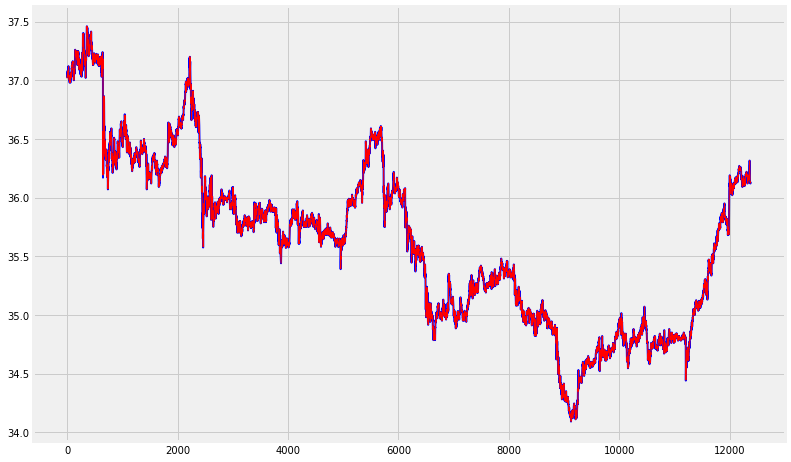

In [17]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))
plt.figure(figsize=(12,8))
plt.plot(test, color='blue', linewidth=2)
plt.plot(predictions, color='red', linewidth=1)
plt.show()